### ReACT Agent Architecture

d:\AgenticAI\.venv\Scripts\python.exe
True


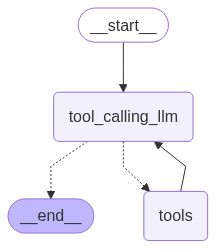

content='Give me the recent ai news and then multiply 5 by 10' additional_kwargs={} response_metadata={} id='6d65e428-7b8d-461c-a336-79de81feaa6a'
content='' additional_kwargs={'tool_calls': [{'id': 'pfhkjvgpp', 'function': {'arguments': '{"query":"recent ai news","search_depth":"advanced","topic":"news"}', 'name': 'tavily_search'}, 'type': 'function'}]} response_metadata={'token_usage': {'completion_tokens': 124, 'prompt_tokens': 2212, 'total_tokens': 2336, 'completion_time': 0.195092315, 'prompt_time': 0.247553051, 'queue_time': 0.273084617, 'total_time': 0.442645366}, 'model_name': 'llama3-8b-8192', 'system_fingerprint': 'fp_8b7c3a83f7', 'finish_reason': 'tool_calls', 'logprobs': None} id='run--69186895-a31d-46a8-9baa-578ca748fa92-0' tool_calls=[{'name': 'tavily_search', 'args': {'query': 'recent ai news', 'search_depth': 'advanced', 'topic': 'news'}, 'id': 'pfhkjvgpp', 'type': 'tool_call'}] usage_metadata={'input_tokens': 2212, 'output_tokens': 124, 'total_tokens': 2336}
content='{

In [ ]:
from langchain_tavily import TavilySearch
from typing import Annotated
from typing_extensions import TypedDict
from langgraph.graph import StateGraph,START,END
from langgraph.graph.message import add_messages
from IPython.display import Image, display



class State(TypedDict):
    messages:Annotated[list,add_messages] ## add_message is acting as reducer

graph_builder=StateGraph(State)
graph_builder

import os 
from dotenv import load_dotenv
load_dotenv()

from langchain_groq import ChatGroq
from langchain.chat_models import init_chat_model

import os
os.environ["GROQ_API_KEY"] = "GROQ_API_KEY"
llm = ChatGroq(model="llama3-8b-8192")
llm

llm = ChatGroq(model="llama3-8b-8192", api_key=os.environ["GROQ_API_KEY"])


tool  = TavilySearch(max_search=2)
tool.invoke("What is langgraph")

import sys
print(sys.executable)

import pkg_resources
installed_packages = {pkg.key for pkg in pkg_resources.working_set}
print('langchain-tavily' in installed_packages)


##Custom function
def multiply(a:int,b:int)->int:
    """Multiply a and b

    args:
         a(int): first int
         b(int): second int
        
    Returns:
        int:output int
    
    """

    return a*b




tools=[tool,multiply]
llm_with_tool=llm.bind_tools(tools)
llm_with_tool

### Stategraph
from langgraph.graph import StateGraph,START,END
from langgraph.prebuilt import ToolNode
from langgraph.prebuilt import tools_condition



## Node Defination
def tool_calling_llm(state:State):
    return {"messages":[llm_with_tool.invoke(state["messages"])]}

## create a graph
builder= StateGraph(State)
builder.add_node("tool_calling_llm",tool_calling_llm)
builder.add_node("tools",ToolNode(tools))

## add edges 
builder.add_edge(START,"tool_calling_llm")
builder.add_conditional_edges(
    "tool_calling_llm",
    # if the latest messgaes (result) from assistant is a tool call ->tools_condition routes to tools
    # if the latest messgaes (result) from assistant is a not tool call -> tools_condition routes to END
    tools_condition
)
builder.add_edge("tools","tool_calling_llm")


##compile the graph
graph1 = builder.compile()
display(Image(graph1.get_graph().draw_mermaid_png()))

respone =graph1.invoke({"messages":"Give me the recent ai news and then multiply 5 by 10"})
respone['messages'][-1].content

for m in respone["messages"]:
    print(m)

In [2]:
import langchain_tavily
print(dir(langchain_tavily))

['TavilyCrawl', 'TavilyExtract', 'TavilyMap', 'TavilySearch', '__all__', '__builtins__', '__cached__', '__doc__', '__file__', '__loader__', '__name__', '__package__', '__path__', '__spec__', '__version__', '_utilities', 'tavily_crawl', 'tavily_extract', 'tavily_map', 'tavily_search']
